<a href="https://colab.research.google.com/github/sharinair14/Python-programs/blob/master/iris_with_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.get_dataset_names()

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /usr/local/lib/python3.6/dist-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [6]:
iris=sns.load_dataset('iris')

In [7]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.shape

(150, 5)

In [12]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

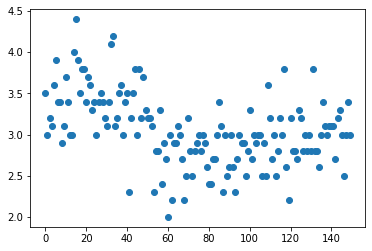

In [15]:
plt.scatter(iris.index,iris['sepal_width'])

In [12]:
iris.index

RangeIndex(start=0, stop=150, step=1)

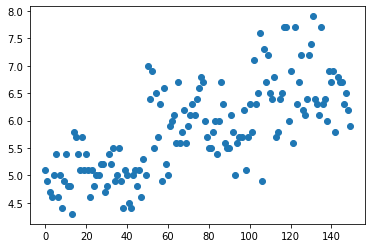

In [16]:
plt.scatter(iris.index,iris['sepal_length'])

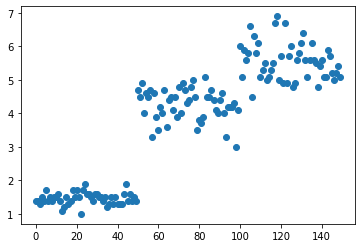

In [14]:
plt.scatter(iris.index,iris['petal_length'])

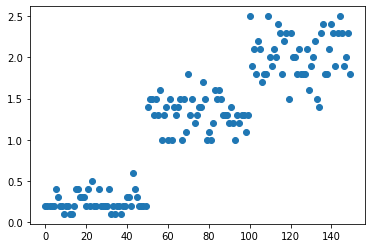

In [15]:
plt.scatter(iris.index,iris['petal_width'])

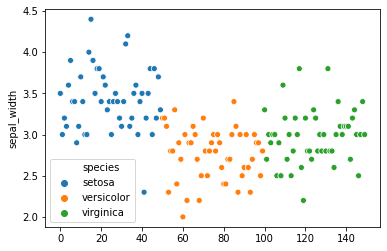

In [17]:
sns.scatterplot(iris.index,iris['sepal_width'],hue=iris['species'])

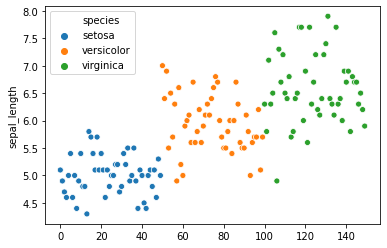

In [17]:
sns.scatterplot(iris.index,iris['sepal_length'],hue=iris['species'])

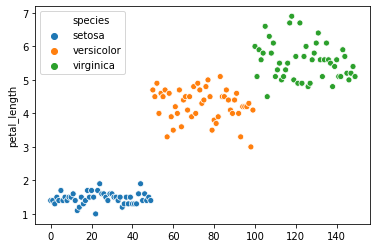

In [18]:
sns.scatterplot(iris.index,iris['petal_length'],hue=iris['species'])

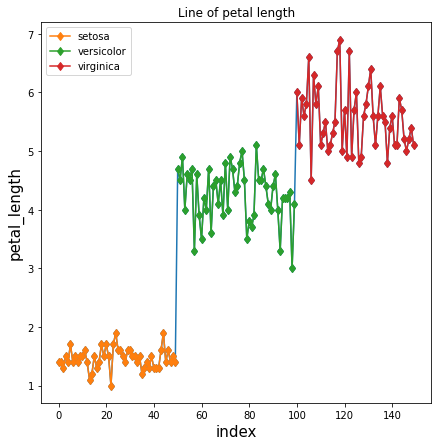

In [18]:
plt.figure(figsize=(7,7))
plt.title('Line of petal length')
plt.xlabel('index',fontsize=15)
plt.ylabel('petal_length',fontsize=15)
plt.plot(iris.index,iris['petal_length'],marker='d')
for name,group in iris.groupby('species'):
  plt.plot(group.index,group['petal_length'],label=name,marker='d')
plt.legend()

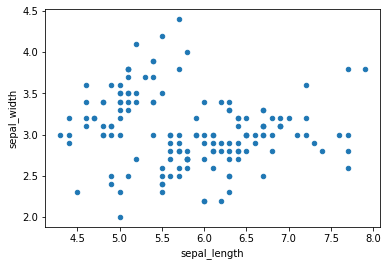

In [19]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')

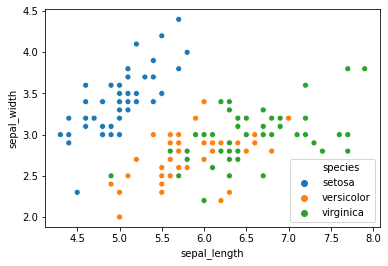

In [20]:
sns.scatterplot(data=iris,x='sepal_length',y='sepal_width',hue=iris['species'])

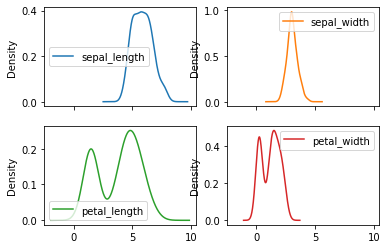

In [21]:
iris.plot(kind='density',subplots=True,layout=(2,2))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09c2fd9eb8>,
      dtype=object)

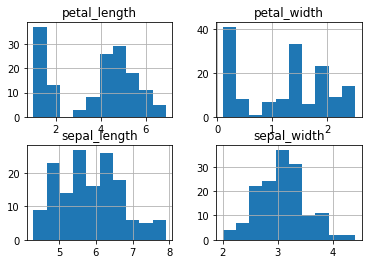

In [22]:
iris.hist()

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

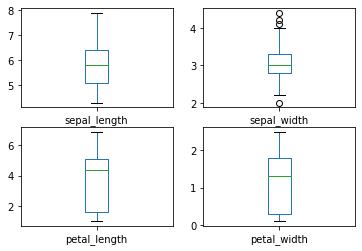

In [23]:
iris.plot(kind='box',subplots=True,layout=(2,2))

In [24]:
iris_df=pd.DataFrame(iris)

In [23]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
iris_df['species_num']=pd.factorize(iris_df['species'])[0]

In [26]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [27]:
iris_df.drop('species', axis= 1, inplace= True)

In [28]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


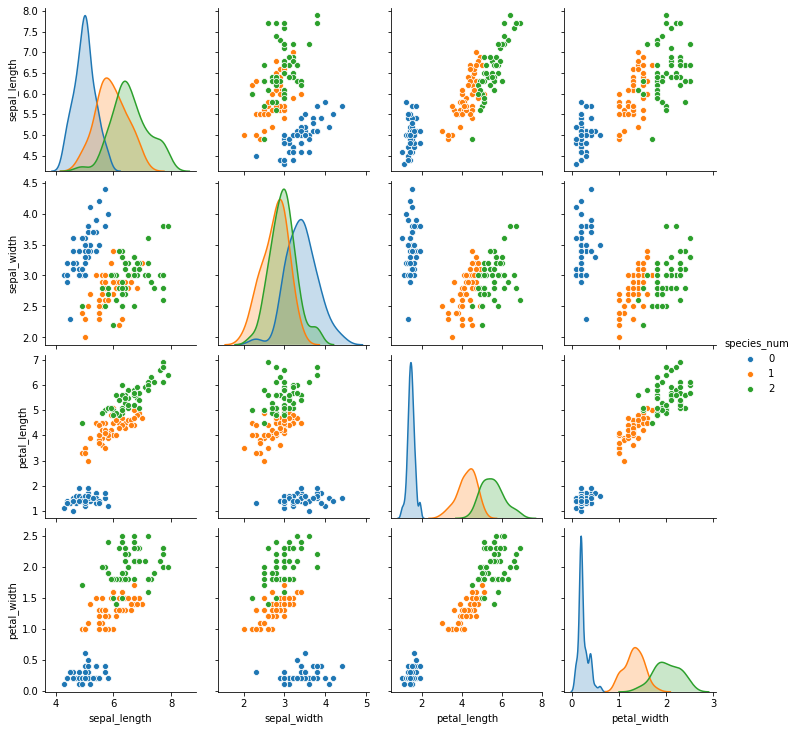

In [29]:
sns.pairplot(iris_df, hue= 'species_num')

In [31]:
X=iris_df.drop(labels='sepal_length',axis=1)
y=iris_df['sepal_length']

In [32]:
X.head()

,sepal_width,petal_length,petal_width,species_num
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [33]:
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred=lr.predict(X_test)

In [40]:
y_pred.shape

(45,)

Evaluating model


In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [42]:
print("Mean square error is ",mean_squared_error(y_pred,y_test))

Mean square error is  0.10366796999947514


In [43]:
print("RMSE is ",np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE is  0.3219751077326866


In [44]:
print("Mean absolute error is ",mean_absolute_error(y_pred,y_test))

Mean absolute error is  0.26361424057314703
